# Figure 3 - Topographic Domain

## 1 - Import Necessary Modules

In [29]:
import cartopy 
import cartopy.io.shapereader as shpreader 
import cartopy.io.shapereader as Reader 
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr 

from cartopy.feature import ShapelyFeature 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from netCDF4 import Dataset 
from wrf import xy_to_ll 

# warnings
import warnings
warnings.filterwarnings('ignore')

## 2 - Open Datasets

In [3]:
# general path
path = fr'geo_em.d0{}.nc'

# domain 1 
dt1 = xr.open_dataset(path.format(1))
d1 = Dataset(path.format(1))

# domain 2
dt2 = xr.open_dataset(path.format(2))
d2 = Dataset(path.format(2))

# domain 3
dt3 = xr.open_dataset(path.format(3))
d3 = Dataset(path.format(3))

In [4]:
# look inside domain 3 dataset
dt3

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 201, west_east: 201, south_north_stag: 202, west_east_stag: 202, land_cat: 21, soil_cat: 16, month: 12, num_urb_params: 132)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag, west_east_stag, land_cat, soil_cat, month, num_urb_params
Data variables: (12/55)
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    ...          ...
    OL2         (Time, south_north, west_east) float32 ...
    OL3         (Time, south_north, west_east) float32 ...
    OL4         (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, west_east) float32 ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 ...
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.8.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        202
    SOUTH-NORTH_GRID_DIMENSION:      202
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    parent_grid_ratio:               3
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1

## 3 - Assign Longitude-Latitude-Height 

In [6]:
# variable names
lon_name = 'XLONG_M'
lat_name = 'XLAT_M'
hgt_name = 'HGT_M'

# lon, lat, hgt for domain1
lat1 = dt1[lat_name]
lon1 = dt1[lon_name]
hgt1 = dt1[hgt_name]

# lon, lat, hgt for domain2
lat2 = dt2[lat_name]
lon2 = dt2[lon_name]
hgt2 = dt2[hgt_name]

# lon, lat, hgt for domain3
lat3 = dt3[lat_name]
lon3 = dt3[lon_name]
hgt3 = dt3[hgt_name]

## 4 - Define Shapefile Paths

In [7]:
# shapefile path names for:

# Turkey - country
turkey_shape = r'turkey_provinces.shp'

# Ankara - province
ankara_shape = r'ankara_shape.shp'

# sea
sea_shp = r'World_Seas_IHO_v3.shp'

## 5 - Find the Corner Coordinates

In [9]:
# corner index and corresponding datasets in list
corner_index = [74, 107, 200]
datasets = [d1, d2, d3]

# list to keep corner lat/lon
left_bottom = []
left_top = []
right_bottom = []
right_top = []

for ds, index in zip(datasets, corner_index):
    
    # left corners
    left_bottom.append(xy_to_ll(ds, 0, 0).values)
    left_top.append(xy_to_ll(ds, 0, index).values)
    
    # right corners
    right_bottom.append(xy_to_ll(ds, index, 0).values)
    right_top.append(xy_to_ll(ds, index, index).values)

## 6 - Create Plot

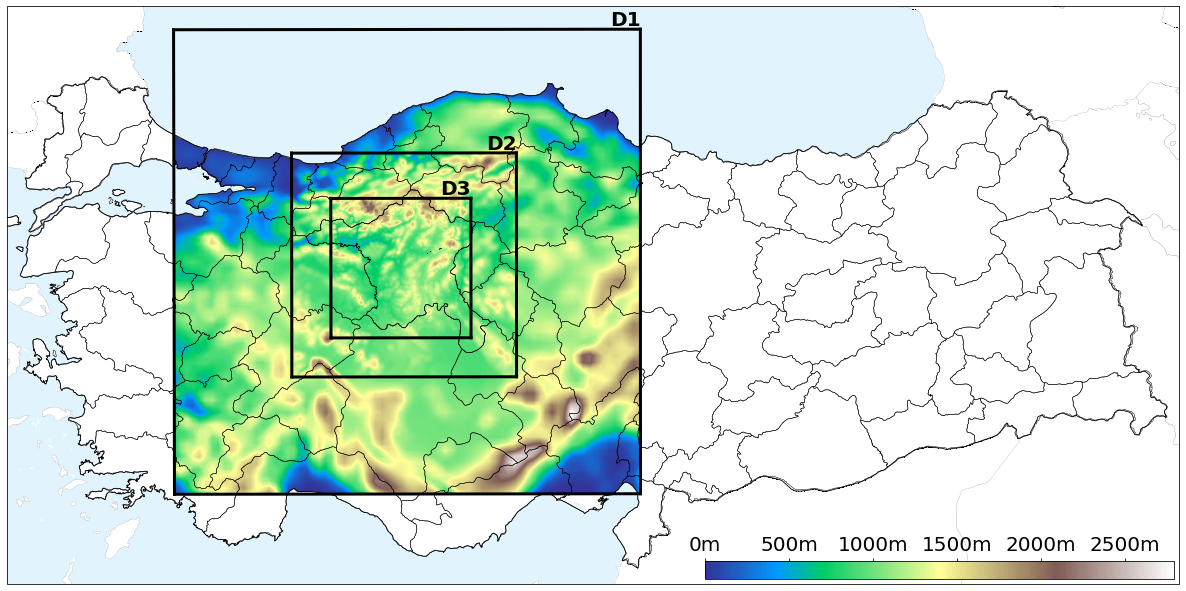

In [20]:
# Create a figure
# projection
cart_proj = cartopy.crs.LambertConformal(32.406708, 39.744022)

# fig and ax
fig = plt.figure(figsize=(21,19))
ax = plt.axes(projection=cart_proj)

# extent of the figure
ax.set_extent([26.2, 44.7, 35.5, 42.5])
       

# add shapefiles to figure
# Turkey - country
shape_feature_turkey = ShapelyFeature(shpreader.Reader(turkey_shape).geometries(),
                                      cartopy.crs.PlateCarree(), 
                                      facecolor='none', edgecolor = 'black',
                                      linewidth = 0.5, zorder = 2.3)
    
# Ankara - province
shape_feature_ankara = ShapelyFeature(shpreader.Reader(ankara_shape).geometries(),
                                      cartopy.crs.PlateCarree(), 
                                      facecolor='none', edgecolor = 'black',
                                      linewidth = 0.5, zorder = 2.3)
    
# Sea
shape_feature_sea = ShapelyFeature(shpreader.Reader(sea_shp).geometries(),
                                     cartopy.crs.PlateCarree(), 
                                     facecolor='#e1f3fd', edgecolor = 'none',
                                     linewidth = 0.5, zorder = 2.2)

# add shapefiles as a feature
ax.add_feature(shape_feature_turkey)
ax.add_feature(shape_feature_ankara)
ax.add_feature(shape_feature_sea)

# External complementary shapefiles
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')

# external countries (shapefiles will be defined for these)
cts = ['Syria', 'Iraq', 'Iran',
       'Azerbaijan', 'Armenia',
       'Russia', 'Georgia', 'Bulgaria',
       'Greece', 'Cyprus', 'Northern Cyprus']
    
# add external shapefile geometries
for country in shpreader.Reader(shpfilename).records():
    
    if country.attributes['ADMIN'] in cts:
        
        count_shp = country.geometry
        for i in range(1):
            ax.add_geometries([count_shp], cartopy.crs.PlateCarree(),
                              facecolor='white', edgecolor = 'black',
                              linewidth = 0.1, zorder = 2.2,)
                
                
    elif country.attributes['ADMIN'] == 'Turkey':
        
        tr = country.geometry
        for i in range(1):
            ax.add_geometries([tr], cartopy.crs.PlateCarree(),
                              edgecolor='black', linewidths=0.8,
                              facecolor='none', zorder=3)


# plot height values on the map (for all domains)  
height = np.arange(0, 2800, 10)

# domain 1
mesh1 = ax.contourf(lon1.values[0], lat1.values[0], hgt1.values[0],
                    height, cmap='terrain', zorder=2,
                    transform=cartopy.crs.PlateCarree())

# domain 2 
mesh2 = ax.contourf(lon2.values[0], lat2.values[0], hgt2.values[0],
                    height, cmap='terrain', zorder=2.1,
                    transform=cartopy.crs.PlateCarree())

# domain 3
mesh3 = ax.contourf(lon3.values[0], lat3.values[0], hgt3.values[0],
                    height, cmap='terrain', zorder=2.2,
                    transform=cartopy.crs.PlateCarree())

# Domain name texts on the map
domain_list = ['D1', 'D2', 'D3']
for i, d_name in zip(range(3), domain_list):
    
    # domain 1
    ax.text(right_top[i][1], right_top[i][0]+0.05, domain_list[i],
            color='k', weight='bold', fontsize=20 ,
            transform = cartopy.crs.PlateCarree(),
            horizontalalignment='right')

# Domain border lines on the map
for i in range(3):
    
    ax.plot([left_bottom[i][1], left_top[i][1],], 
            [left_bottom[i][0], left_top[i][0],],
            c='k', linewidth=3, zorder=10,
            transform = cartopy.crs.PlateCarree(),
            )
    
    ax.plot([left_top[i][1], right_top[i][1],],
            [left_top[i][0], right_top[i][0],],
            c='k', linewidth=3, zorder=10,
            transform = cartopy.crs.PlateCarree())
    
    ax.plot([right_top[i][1], right_bottom[i][1],],
            [right_top[i][0], right_bottom[i][0],],
            c='k', linewidth=3, zorder=10,
            transform = cartopy.crs.PlateCarree())
    
    ax.plot([right_bottom[i][1], left_bottom[i][1],],
            [right_bottom[i][0], left_bottom[i][0],],
            c='k', linewidth=3, zorder=10,
            transform = cartopy.crs.PlateCarree())

# add colorbar
cbaxes = inset_axes(ax, width="40%", height="3%",
                    loc='lower right') 

cb = plt.colorbar(mesh1, cax=cbaxes, pad=70.01,
                  shrink=0.75, orientation = 'horizontal',
                  ticks = np.arange(0, 2850, 500))

# tick parameters
cb.ax.set_xticklabels([f'{i}m' for i in np.arange(0, 2850, 500)])
cbaxes.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=20, labelcolor='black',
                  color='black' )


# save figure
plt.savefig(r'figure3.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=500)